In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
event = pd.read_csv("/Users/apple-indonesia/Desktop/Event .csv")
merchant = pd.read_csv("/Users/apple-indonesia/Desktop/Merchant - Extract 1.csv")
payment_method = pd.read_csv("/Users/apple-indonesia/Desktop/Payment_Method - Extract 1.csv")
product = pd.read_csv("//Users/apple-indonesia/Desktop/Product - Extract 1.csv")
product_category = pd.read_csv("/Users/apple-indonesia/Desktop/Product_Category - Extract 1.csv")
transaction_item = pd.read_csv("/Users/apple-indonesia/Desktop/Transaction_Item - Extract 1.csv")
transactions = pd.read_csv("/Users/apple-indonesia/Desktop/Transactions - Extract 1.csv")
user = pd.read_csv("/Users/apple-indonesia/Desktop/User - Extract 1.csv")

In [3]:
event.head(2)

,event_id,event_name,timestamp_event,user_id,favorite_flag
0,137959,Checkout,2020-10-11 14:38:47 UTC,10240,0.0
1,113634,Checkout,2020-05-13 20:27:34 UTC,10496,NaN


In [4]:
event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118874 entries, 0 to 118873
Data columns (total 5 columns):
event_id           118874 non-null int64
event_name         118874 non-null object
timestamp_event    118874 non-null object
user_id            118874 non-null int64
favorite_flag      83843 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.5+ MB


In [5]:
merchant.head(2)

,merchant_id,merchant_name,province,city
0,20013,Wayscape,Banten,Kota Tangerang
1,20017,Ignition Point,Banten,Kota Tangerang


In [6]:
payment_method.head(2)

,payment_method_id,payment_method
0,1,credit card
1,2,debit card


In [7]:
product.tail(10)

,product_id,product,product_category,price,merchant_id
108,30034,Toys Nerf,10,1890000,20029
109,30044,Justice League Boosk Special Edition,10,1700000,20029
110,30046,Plants,10,1290000,20029
111,30029,Action Figure Sakura,10,1743000,20034
112,30033,Action Figure SheHulk,10,1250000,20034
113,30035,Toys Lego,10,1660000,20034
114,30039,Diecast Justice League,10,1300000,20034
115,30041,Harry Poter Series Books,10,1510000,20034
116,30043,Marvel Comics Special Edition,10,990000,20034
117,30045,Toys,10,1450000,20034


In [8]:
product[product.product_category == 5]

,product_id,product,product_category,price,merchant_id
30,10026,Sun Care,5,100000,20008
31,10028,Facial Wash,5,50000,20008
32,10030,Perfume,5,300000,20008
33,10029,Shampoo,5,75000,20013
34,10031,Deodorant,5,45000,20013
35,10025,Skin Care,5,250000,20014
36,10027,Body Wash,5,75000,20046


In [9]:
product_category.head(10)

,product_category_id,product_category
0,1,Clothing
1,2,Groceries
2,3,Stationery
3,4,Games
4,5,Health & Beauty
5,6,Mother & Care
6,7,Sport Equiment
7,8,Shoes
8,9,Electronics
9,10,Hobbies


In [10]:
transaction_item.head(2)

,transaction_item_id,transaction_id,product_id,qty
0,2010031,201003,10000,1
1,2010111,201011,10000,1


In [11]:
transactions.head(2)

,transaction_id,transaction_date,user_id,status,total_amount,payment_method_id
0,201635,3/19/2020 13:12:43,10671,Completed,2560000,1
1,302777,12/12/2020 8:29:15,10572,Completed,2560000,1


In [12]:
user.head(2)

,user_id,regist_date,name,gender,province,city
0,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung
1,10089,10/19/2020,Luluh Prayoga,male,Jawa Barat,Bandung


In [13]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1702 entries, 0 to 1701
Data columns (total 6 columns):
user_id        1702 non-null int64
regist_date    1702 non-null object
name           1702 non-null object
gender         1702 non-null object
province       1702 non-null object
city           1702 non-null object
dtypes: int64(1), object(5)
memory usage: 79.9+ KB


In [14]:
df_transaction = transactions.merge(transaction_item, on = "transaction_id", how = "inner")
df_transaction.head(2)

,transaction_id,transaction_date,user_id,status,total_amount,payment_method_id,transaction_item_id,product_id,qty
0,201635,3/19/2020 13:12:43,10671,Completed,2560000,1,2016352,30007,1
1,201635,3/19/2020 13:12:43,10671,Completed,2560000,1,2016351,30008,1


In [15]:
df_transaction_payment_method = df_transaction.merge(payment_method, on = "payment_method_id", how = "inner")
df_transaction_payment_method.head(2)

,transaction_id,transaction_date,user_id,status,total_amount,payment_method_id,transaction_item_id,product_id,qty,payment_method
0,201635,3/19/2020 13:12:43,10671,Completed,2560000,1,2016352,30007,1,credit card
1,201635,3/19/2020 13:12:43,10671,Completed,2560000,1,2016351,30008,1,credit card


In [16]:
df_transaction_payment_method.product_id.unique()

array([30007, 30008, 30023, 30035, 30014, 20000, 20003, 20004, 20002,
       10002, 10007, 20001, 30005, 30040, 30011, 30028, 30012, 30020,
       30042, 10008, 10013, 10000, 30006, 30038, 30046, 20017, 20025,
       20016, 20010, 20011, 20023, 10024, 10023, 10009, 10019, 10011,
       10020, 10017, 10010, 30018, 30022, 20018, 20021, 10005, 10015,
       20008, 20015, 20014, 30045, 20006, 30034, 30002, 20026, 30030,
       20019, 20022, 30041, 30044, 30016, 30021, 20024, 30001, 30004,
       10014, 10021, 10022, 30031, 30039, 30025, 10003, 30015, 30033,
       10012, 10016, 20007, 30013, 30043, 10006, 30036, 30009, 30037,
       30027, 10001, 20028, 30026, 20012, 30017, 20020, 20005, 30000,
       10004, 30010, 20013, 30003, 10018, 30024, 30019, 30029, 30032,
       20027, 20009])

In [17]:
df_transaction_payment_method.product_id.nunique()

101

In [18]:
df_product = product.merge(product_category, left_on = "product_category", right_on = "product_category_id", how = "inner")
df_product.head(2)

,product_id,product,product_category_x,price,merchant_id,product_category_id,product_category_y
0,10002,Jeans,1,200000,20007,1,Clothing
1,10004,Dress,1,250000,20007,1,Clothing


In [19]:
df_product.product_category_x.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
df_product.product_category_id.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
df_product.product_id.unique()

array([10002, 10004, 10005, 10006, 10007, 10008, 10003, 10001, 10009,
       10000, 10010, 10011, 10012, 10013, 10014, 10015, 10016, 10017,
       10018, 10019, 10022, 10024, 10021, 10020, 10023, 20001, 20002,
       20004, 20003, 20000, 10026, 10028, 10030, 10029, 10031, 10025,
       10027, 20006, 10034, 10036, 30051, 30047, 30048, 10033, 30049,
       30050, 10032, 10035, 20005, 20010, 20012, 20015, 20016, 20017,
       20007, 20008, 20009, 20011, 20013, 20014, 20018, 20019, 20020,
       20021, 20022, 20023, 20024, 20025, 20026, 20027, 20028, 30000,
       30010, 30014, 30017, 30020, 30003, 30008, 30011, 30025, 30012,
       30015, 30023, 30001, 30006, 30009, 30013, 30016, 30019, 30024,
       30026, 30002, 30004, 30005, 30018, 30021, 30022, 30007, 30027,
       30028, 30030, 30032, 30036, 30037, 30038, 30040, 30042, 30031,
       30034, 30044, 30046, 30029, 30033, 30035, 30039, 30041, 30043,
       30045])

In [22]:
df_product.product_id.nunique()

118

In [23]:
df_product.drop('product_category_x', axis=1)

,product_id,product,price,merchant_id,product_category_id,product_category_y
0,10002,Jeans,200000,20007,1,Clothing
1,10004,Dress,250000,20007,1,Clothing
2,10005,Jacket,300000,20007,1,Clothing
3,10006,Sweater,150000,20007,1,Clothing
4,10007,Coat,300000,20007,1,Clothing
...,...,...,...,...,...,...
113,30035,Toys Lego,1660000,20034,10,Hobbies
114,30039,Diecast Justice League,1300000,20034,10,Hobbies
115,30041,Harry Poter Series Books,1510000,20034,10,Hobbies
116,30043,Marvel Comics Special Edition,990000,20034,10,Hobbies


In [24]:
df_product[df_product.product_category_id == 5]

,product_id,product,product_category_x,price,merchant_id,product_category_id,product_category_y
30,10026,Sun Care,5,100000,20008,5,Health & Beauty
31,10028,Facial Wash,5,50000,20008,5,Health & Beauty
32,10030,Perfume,5,300000,20008,5,Health & Beauty
33,10029,Shampoo,5,75000,20013,5,Health & Beauty
34,10031,Deodorant,5,45000,20013,5,Health & Beauty
35,10025,Skin Care,5,250000,20014,5,Health & Beauty
36,10027,Body Wash,5,75000,20046,5,Health & Beauty


In [25]:
df_product_merchant = df_product.merge(merchant, on = "merchant_id", how = "inner")
df_product_merchant.head(2)

,product_id,product,product_category_x,price,merchant_id,product_category_id,product_category_y,merchant_name,province,city
0,10002,Jeans,1,200000,20007,1,Clothing,Diamonday,Jawa Timur,Surabaya
1,10004,Dress,1,250000,20007,1,Clothing,Diamonday,Jawa Timur,Surabaya


In [26]:
df_product_merchant[df_product_merchant.product_category_id == 10]

,product_id,product,product_category_x,price,merchant_id,product_category_id,product_category_y,merchant_name,province,city
98,30027,Action Figure Naruto,10,1175000,20024,10,Hobbies,NextGen Incubator,Jawa Barat,Bandung
99,30028,Action Figure Sasuke,10,1920000,20024,10,Hobbies,NextGen Incubator,Jawa Barat,Bandung
100,30030,Action Figure Ironman,10,842000,20024,10,Hobbies,NextGen Incubator,Jawa Barat,Bandung
101,30032,Action Figure Capt America,10,1090000,20024,10,Hobbies,NextGen Incubator,Jawa Barat,Bandung
102,30036,Toys Barbie,10,930000,20024,10,Hobbies,NextGen Incubator,Jawa Barat,Bandung
103,30037,Diecast Avengers,10,1310000,20024,10,Hobbies,NextGen Incubator,Jawa Barat,Bandung
104,30038,Diecast Toystory,10,1410000,20024,10,Hobbies,NextGen Incubator,Jawa Barat,Bandung
105,30040,Medical Books,10,1920000,20024,10,Hobbies,NextGen Incubator,Jawa Barat,Bandung
106,30042,Laskar Pelangi Special Edition,10,1450000,20024,10,Hobbies,NextGen Incubator,Jawa Barat,Bandung
107,30031,Action Figure Hulk,10,1140000,20029,10,Hobbies,Snowflake,DKI Jakarta,South Jakarta


In [27]:
df_product_merchant[df_product_merchant.product_category_x == 5]

,product_id,product,product_category_x,price,merchant_id,product_category_id,product_category_y,merchant_name,province,city
30,10026,Sun Care,5,100000,20008,5,Health & Beauty,Coco Glamour,DKI Jakarta,Central Jakarta
31,10028,Facial Wash,5,50000,20008,5,Health & Beauty,Coco Glamour,DKI Jakarta,Central Jakarta
32,10030,Perfume,5,300000,20008,5,Health & Beauty,Coco Glamour,DKI Jakarta,Central Jakarta
33,10029,Shampoo,5,75000,20013,5,Health & Beauty,Wayscape,Banten,Kota Tangerang
34,10031,Deodorant,5,45000,20013,5,Health & Beauty,Wayscape,Banten,Kota Tangerang
35,10025,Skin Care,5,250000,20014,5,Health & Beauty,Glossio,Jawa Tengah,Semarang
36,10027,Body Wash,5,75000,20046,5,Health & Beauty,Wir Asia,DKI Jakarta,South Jakarta


In [28]:
df_product_merchant.drop("product_category_x",axis=1)

,product_id,product,price,merchant_id,product_category_id,product_category_y,merchant_name,province,city
0,10002,Jeans,200000,20007,1,Clothing,Diamonday,Jawa Timur,Surabaya
1,10004,Dress,250000,20007,1,Clothing,Diamonday,Jawa Timur,Surabaya
2,10005,Jacket,300000,20007,1,Clothing,Diamonday,Jawa Timur,Surabaya
3,10006,Sweater,150000,20007,1,Clothing,Diamonday,Jawa Timur,Surabaya
4,10007,Coat,300000,20007,1,Clothing,Diamonday,Jawa Timur,Surabaya
...,...,...,...,...,...,...,...,...,...
113,30035,Toys Lego,1660000,20034,10,Hobbies,Munchies,Jawa Barat,Kota Bogor
114,30039,Diecast Justice League,1300000,20034,10,Hobbies,Munchies,Jawa Barat,Kota Bogor
115,30041,Harry Poter Series Books,1510000,20034,10,Hobbies,Munchies,Jawa Barat,Kota Bogor
116,30043,Marvel Comics Special Edition,990000,20034,10,Hobbies,Munchies,Jawa Barat,Kota Bogor


In [29]:
df_product_merchant[df_product_merchant.product_category_id == 5]

,product_id,product,product_category_x,price,merchant_id,product_category_id,product_category_y,merchant_name,province,city
30,10026,Sun Care,5,100000,20008,5,Health & Beauty,Coco Glamour,DKI Jakarta,Central Jakarta
31,10028,Facial Wash,5,50000,20008,5,Health & Beauty,Coco Glamour,DKI Jakarta,Central Jakarta
32,10030,Perfume,5,300000,20008,5,Health & Beauty,Coco Glamour,DKI Jakarta,Central Jakarta
33,10029,Shampoo,5,75000,20013,5,Health & Beauty,Wayscape,Banten,Kota Tangerang
34,10031,Deodorant,5,45000,20013,5,Health & Beauty,Wayscape,Banten,Kota Tangerang
35,10025,Skin Care,5,250000,20014,5,Health & Beauty,Glossio,Jawa Tengah,Semarang
36,10027,Body Wash,5,75000,20046,5,Health & Beauty,Wir Asia,DKI Jakarta,South Jakarta


In [30]:
df_product_merchant[df_product_merchant.product_category_id == 4]

,product_id,product,product_category_x,price,merchant_id,product_category_id,product_category_y,merchant_name,province,city
25,20001,Role Playing Games,4,800000,20020,4,Games,Titan,Jawa Barat,Kota Bekasi
26,20002,Real Time Strategy,4,800000,20021,4,Games,Lotus,Jawa Barat,Kota Depok
27,20004,Shooter,4,800000,20023,4,Games,Excel,Banten,Kota Tangerang
28,20003,Simulation,4,800000,20032,4,Games,Heroic,DKI Jakarta,Jakarta Selatan
29,20000,Horror,4,800000,20047,4,Games,Kino,Jawa Timur,Surabaya


In [31]:
df_product.product_id.nunique()

118

In [32]:
df_user_transaction_payment_method = user.merge(df_transaction_payment_method, on = "user_id", how = "inner")
df_user_transaction_payment_method.head(2)

,user_id,regist_date,name,gender,province,city,transaction_id,transaction_date,status,total_amount,payment_method_id,transaction_item_id,product_id,qty,payment_method
0,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,2,3066981,10009,1,debit card
1,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,304225,6/18/2021 18:26:19,Completed,130000,4,3042252,10008,1,e-wallet


In [33]:
df_user_transaction_payment_method.product_id.nunique()

101

In [34]:
df_user_transaction_payment_method[df_user_transaction_payment_method.product_id == 20000]

,user_id,regist_date,name,gender,province,city,transaction_id,transaction_date,status,total_amount,payment_method_id,transaction_item_id,product_id,qty,payment_method
89,10390,4/23/2020,Hendra Pangestu,male,Jawa Barat,Bandung,202845,8/5/2020 22:44:33,Completed,800000,1,2028451,20000,1,credit card
144,10480,10/14/2020,Balidin Maryanto Tarihoran S.I.Kom,male,Jawa Barat,Bandung,306981,11/1/2021 11:29:53,Completed,800000,5,3069811,20000,1,paylater
161,10504,3/8/2020,Gadang Kusumo,male,Jawa Barat,Bandung,301480,10/11/2020 11:17:00,Completed,1520000,3,3014801,20000,1,transfer
468,10375,2/21/2020,Nardi Ardianto,male,Jawa Tengah,Semarang,301653,11/10/2020 18:27:30,Completed,1600000,5,3016532,20000,1,paylater
485,10417,12/20/2019,Kenari Marbun,male,Jawa Tengah,Semarang,306933,10/20/2021 9:49:41,Completed,800000,4,3069331,20000,1,e-wallet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,20727,1/14/2020,Zamira Suartini,female,Banten,Tangerang Selatan,305518,7/29/2021 15:52:45,Completed,800000,5,3055181,20000,1,paylater
15507,20746,6/2/2020,Ina Wahyuni,female,Banten,Tangerang Selatan,306984,11/2/2021 11:08:22,Completed,800000,1,3069841,20000,1,credit card
15510,20746,6/2/2020,Ina Wahyuni,female,Banten,Tangerang Selatan,301617,11/3/2020 18:08:20,Completed,1650000,2,3016171,20000,1,debit card
15512,20746,6/2/2020,Ina Wahyuni,female,Banten,Tangerang Selatan,305711,9/16/2021 14:44:51,Completed,800000,3,3057111,20000,1,transfer


In [35]:
df1 = df_user_transaction_payment_method.merge(df_product_merchant, on = "product_id", how = "inner" )
df1.head(2)

,user_id,regist_date,name,gender,province_x,city_x,transaction_id,transaction_date,status,total_amount,...,payment_method,product,product_category_x,price,merchant_id,product_category_id,product_category_y,merchant_name,province_y,city_y
0,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,debit card,Underwear,1,50000,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi
1,10132,6/8/2020,Nrima Wahyudin,male,Jawa Barat,Bandung,201799,6/25/2020 14:12:53,Completed,150000,...,transfer,Underwear,1,50000,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi


In [36]:
df1[df1.product_category_id == 5]

,user_id,regist_date,name,gender,province_x,city_x,transaction_id,transaction_date,status,total_amount,...,payment_method,product,product_category_x,price,merchant_id,product_category_id,product_category_y,merchant_name,province_y,city_y


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15818 entries, 0 to 15817
Data columns (total 24 columns):
user_id                15818 non-null int64
regist_date            15818 non-null object
name                   15818 non-null object
gender                 15818 non-null object
province_x             15818 non-null object
city_x                 15818 non-null object
transaction_id         15818 non-null int64
transaction_date       15818 non-null object
status                 15818 non-null object
total_amount           15818 non-null int64
payment_method_id      15818 non-null int64
transaction_item_id    15818 non-null int64
product_id             15818 non-null int64
qty                    15818 non-null int64
payment_method         15818 non-null object
product                15818 non-null object
product_category_x     15818 non-null int64
price                  15818 non-null int64
merchant_id            15818 non-null int64
product_category_id    15818 non-null int64
pr

In [38]:
df2 = df1.merge(event, on = "user_id", how = "inner")
df2.head(2)

,user_id,regist_date,name,gender,province_x,city_x,transaction_id,transaction_date,status,total_amount,...,merchant_id,product_category_id,product_category_y,merchant_name,province_y,city_y,event_id,event_name,timestamp_event,favorite_flag
0,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,184167,Checkout,2021-06-18 18:26:11 UTC,1.0
1,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,213044,Checkout,2021-11-27 19:15:24 UTC,1.0


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144085 entries, 0 to 2144084
Data columns (total 28 columns):
user_id                int64
regist_date            object
name                   object
gender                 object
province_x             object
city_x                 object
transaction_id         int64
transaction_date       object
status                 object
total_amount           int64
payment_method_id      int64
transaction_item_id    int64
product_id             int64
qty                    int64
payment_method         object
product                object
product_category_x     int64
price                  int64
merchant_id            int64
product_category_id    int64
product_category_y     object
merchant_name          object
province_y             object
city_y                 object
event_id               int64
event_name             object
timestamp_event        object
favorite_flag          float64
dtypes: float64(1), int64(12), object(15)
memory usage: 47

In [40]:
df2.status.unique()

array(['Completed', 'Cancelled'], dtype=object)

In [41]:
df2.province_x.unique()

array(['Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'DKI Jakarta', 'Banten'],
      dtype=object)

In [42]:
df2.city_x.unique()

array(['Bandung', 'Semarang', 'Surabaya', 'surabaya', 'Kota Bogor',
       'Kota Depok', 'Kota Bekasi', 'Jakarta Barat', 'Jakarta Pusat',
       'Jakarta Timur', 'Jakarta Utara', 'South Jakarta',
       'Kota Tangerang', 'Central Jakarta', 'Jakarta Selatan',
       'Tangerang Selatan'], dtype=object)

In [43]:
df2.province_y.unique()

array(['Jawa Barat', 'Jawa Timur', 'DKI Jakarta', 'Banten', 'Jawa Tengah'],
      dtype=object)

In [44]:
df2.city_y.unique()

array(['Kota Bekasi', 'Surabaya', 'Jakarta Utara', 'Kota Depok',
       'Central Jakarta', 'Jakarta Selatan', 'Jakarta Timur',
       'Kota Bogor', 'Jakarta Pusat', 'Jakarta Barat', 'Bandung',
       'Kota Tangerang', 'Semarang', 'surabaya', 'South Jakarta'],
      dtype=object)

In [45]:
df2.product_category_x.unique()

array([ 1,  2,  3,  8,  4,  7,  6, 10,  9])

In [46]:
df1.product_category_y.unique()

array(['Clothing', 'Groceries', 'Stationery', 'Shoes', 'Games',
       'Sport Equiment', 'Mother & Care', 'Hobbies', 'Electronics'],
      dtype=object)

In [47]:
df2.product_category_id.unique()

array([ 1,  2,  3,  8,  4,  7,  6, 10,  9])

In [48]:
df2.transaction_item_id.nunique()

15818

In [49]:
df2.product_id.unique()

array([10009, 10008, 10016, 10020, 10003, 10012, 10011, 10005, 10002,
       10024, 10014, 10023, 10017, 10018, 10013, 10004, 10019, 10001,
       10000, 10006, 10015, 10021, 10010, 10022, 10007, 20024, 20026,
       20004, 20028, 20007, 20002, 20017, 20012, 20001, 20016, 20005,
       20006, 20027, 20009, 20020, 20025, 20015, 20010, 20022, 20000,
       20011, 20021, 20008, 20023, 20018, 20019, 20003, 20014, 20013,
       30040, 30011, 30015, 30000, 30028, 30003, 30007, 30023, 30035,
       30021, 30045, 30027, 30002, 30012, 30042, 30004, 30006, 30025,
       30013, 30010, 30018, 30009, 30046, 30026, 30032, 30005, 30016,
       30044, 30008, 30030, 30017, 30034, 30039, 30020, 30036, 30014,
       30022, 30033, 30001, 30038, 30019, 30041, 30037, 30031, 30024,
       30043, 30029])

In [50]:
df2.product_category_x.unique()

array([ 1,  2,  3,  8,  4,  7,  6, 10,  9])

In [51]:
df2.drop('product_category_x', axis=1)

,user_id,regist_date,name,gender,province_x,city_x,transaction_id,transaction_date,status,total_amount,...,merchant_id,product_category_id,product_category_y,merchant_name,province_y,city_y,event_id,event_name,timestamp_event,favorite_flag
0,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,184167,Checkout,2021-06-18 18:26:11 UTC,1.0
1,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,213044,Checkout,2021-11-27 19:15:24 UTC,1.0
2,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,184168,Completed,2021-06-18 18:26:19 UTC,1.0
3,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,213045,Completed,2021-11-27 19:15:30 UTC,1.0
4,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,184162,View cart,2021-06-18 18:24:39 UTC,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144080,20424,4/4/2020,Raina Nurdiyanti,female,DKI Jakarta,South Jakarta,306614,11/6/2021 8:45:11,Completed,50000,...,20044,2,Groceries,Doid,Jawa Barat,Kota Bogor,208808,Using promo code,2021-11-06 08:43:34 UTC,0.0
2144081,20424,4/4/2020,Raina Nurdiyanti,female,DKI Jakarta,South Jakarta,306614,11/6/2021 8:45:11,Completed,50000,...,20044,2,Groceries,Doid,Jawa Barat,Kota Bogor,162294,Change payment method,2021-01-18 19:46:26 UTC,1.0
2144082,20424,4/4/2020,Raina Nurdiyanti,female,DKI Jakarta,South Jakarta,306614,11/6/2021 8:45:11,Completed,50000,...,20044,2,Groceries,Doid,Jawa Barat,Kota Bogor,208811,Change payment method,2021-11-06 08:44:56 UTC,0.0
2144083,20424,4/4/2020,Raina Nurdiyanti,female,DKI Jakarta,South Jakarta,306614,11/6/2021 8:45:11,Completed,50000,...,20044,2,Groceries,Doid,Jawa Barat,Kota Bogor,162293,Choose delivery services,2021-01-18 19:46:21 UTC,1.0


In [52]:
df2.isnull().sum()

user_id                     0
regist_date                 0
name                        0
gender                      0
province_x                  0
city_x                      0
transaction_id              0
transaction_date            0
status                      0
total_amount                0
payment_method_id           0
transaction_item_id         0
product_id                  0
qty                         0
payment_method              0
product                     0
product_category_x          0
price                       0
merchant_id                 0
product_category_id         0
product_category_y          0
merchant_name               0
province_y                  0
city_y                      0
event_id                    0
event_name                  0
timestamp_event             0
favorite_flag          680058
dtype: int64

In [53]:
df2.duplicated().sum()

0

In [54]:
df_final = df2.rename(columns = {'province_x': 'user_province',
                                 'city_x': 'user_city',
                                 'product_category_y': 'product_category',
                                 'province_y': 'merchant_province',
                                 'city_y': 'merchant_city'})


In [55]:
df_final.head()

,user_id,regist_date,name,gender,user_province,user_city,transaction_id,transaction_date,status,total_amount,...,merchant_id,product_category_id,product_category,merchant_name,merchant_province,merchant_city,event_id,event_name,timestamp_event,favorite_flag
0,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,184167,Checkout,2021-06-18 18:26:11 UTC,1.0
1,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,213044,Checkout,2021-11-27 19:15:24 UTC,1.0
2,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,184168,Completed,2021-06-18 18:26:19 UTC,1.0
3,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,213045,Completed,2021-11-27 19:15:30 UTC,1.0
4,10088,1/23/2020,Mustika Dabukke,male,Jawa Barat,Bandung,306698,11/27/2021 19:15:30,Completed,50000,...,20016,1,Clothing,LuxHut,Jawa Barat,Kota Bekasi,184162,View cart,2021-06-18 18:24:39 UTC,1.0


In [56]:
df_final.groupby('gender').agg({'gender': 'count'})

,gender
gender,
female,1423121
male,720964


In [57]:
df_final.describe()

,user_id,transaction_id,total_amount,payment_method_id,transaction_item_id,product_id,qty,product_category_x,price,merchant_id,product_category_id,event_id,favorite_flag
count,2.144085e+06,2.144085e+06,2.144085e+06,2.144085e+06,2.144085e+06,2.144085e+06,2.144085e+06,2.144085e+06,2.144085e+06,2.144085e+06,2.144085e+06,2.144085e+06,1.464027e+06
mean,1.738065e+04,2.711471e+05,1.999790e+06,3.623118e+00,2.711472e+06,2.707319e+04,1.057957e+00,8.504182e+00,1.145408e+06,2.002505e+04,8.504182e+00,1.575009e+05,7.331839e-01
std,4.860199e+03,4.779967e+04,1.007533e+06,1.283308e+00,4.779967e+05,5.708753e+03,2.336615e-01,2.089433e+00,4.486189e+05,1.209921e+01,2.089433e+00,3.401559e+04,4.422956e-01
min,1.000000e+04,2.010010e+05,1.500000e+04,1.000000e+00,2.010011e+06,1.000000e+04,1.000000e+00,1.000000e+00,1.500000e+04,2.000000e+04,1.000000e+00,1.000010e+05,0.000000e+00
25%,1.063900e+04,2.033340e+05,1.300000e+06,3.000000e+00,2.033341e+06,3.000000e+04,1.000000e+00,9.000000e+00,8.420000e+05,2.001800e+04,9.000000e+00,1.280770e+05,0.000000e+00
50%,2.084500e+04,3.025850e+05,1.920000e+06,4.000000e+00,3.025851e+06,3.001600e+04,1.000000e+00,9.000000e+00,1.190000e+06,2.002600e+04,9.000000e+00,1.566230e+05,1.000000e+00
75%,2.089700e+04,3.048300e+05,2.740000e+06,5.000000e+00,3.048301e+06,3.003100e+04,1.000000e+00,1.000000e+01,1.450000e+06,2.003400e+04,1.000000e+01,1.868600e+05,1.000000e+00
max,2.100000e+04,3.085830e+05,6.820000e+06,5.000000e+00,3.085831e+06,3.004600e+04,2.000000e+00,1.000000e+01,1.920000e+06,2.004900e+04,1.000000e+01,2.188760e+05,1.000000e+00


In [58]:
df_final = df_final.drop('product_category_x',axis=1)

In [59]:
df_final.transaction_id.nunique()

10493

In [60]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2144085 entries, 0 to 2144084
Data columns (total 27 columns):
user_id                int64
regist_date            object
name                   object
gender                 object
user_province          object
user_city              object
transaction_id         int64
transaction_date       object
status                 object
total_amount           int64
payment_method_id      int64
transaction_item_id    int64
product_id             int64
qty                    int64
payment_method         object
product                object
price                  int64
merchant_id            int64
product_category_id    int64
product_category       object
merchant_name          object
merchant_province      object
merchant_city          object
event_id               int64
event_name             object
timestamp_event        object
favorite_flag          float64
dtypes: float64(1), int64(11), object(15)
memory usage: 458.0+ MB


In [61]:
nums = ['user_id', 'transaction_id', 'total_amount', 'payment_method_id', 'transaction_item_id', 'product_id', 'qty', 'price', 'merchant_id', 'product_category_id']

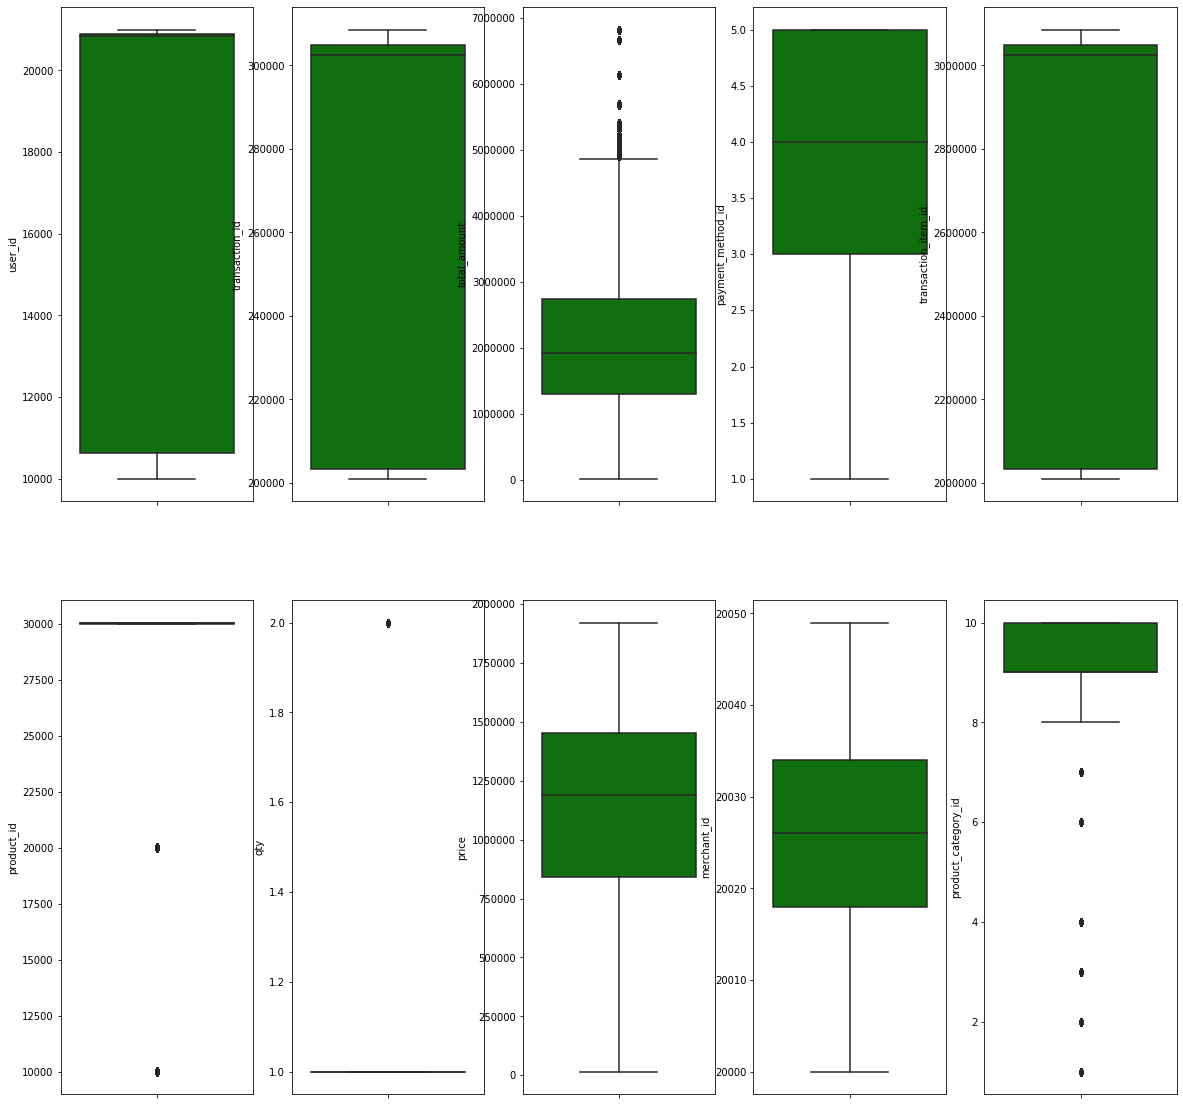

In [62]:
plt.figure(figsize=(20,20))
feature = nums
for i in range (0, len(feature)):
    plt.subplot(2, 5, i+1)
    sns.boxplot(y=df_final[feature[i]], color='green', orient='v')

In [63]:
df_final['user_province'].unique()

array(['Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'DKI Jakarta', 'Banten'],
      dtype=object)

In [64]:
df_final['user_province'] = df_final['user_province'].replace(['Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'DKI Jakarta'], ['West Java', 'Central Java', "East Java", 'Jakarta'])

In [65]:
df_final.user_province.unique()

array(['West Java', 'Central Java', 'East Java', 'Jakarta', 'Banten'],
      dtype=object)

In [66]:
df_final['user_city'].unique()

array(['Bandung', 'Semarang', 'Surabaya', 'surabaya', 'Kota Bogor',
       'Kota Depok', 'Kota Bekasi', 'Jakarta Barat', 'Jakarta Pusat',
       'Jakarta Timur', 'Jakarta Utara', 'South Jakarta',
       'Kota Tangerang', 'Central Jakarta', 'Jakarta Selatan',
       'Tangerang Selatan'], dtype=object)

In [67]:
df_final['user_city'] = df_final['user_city'].replace(['surabaya', 'Kota Bogor', 'Kota Depok', 'Kota Bekasi', 'Jakarta Barat', 'Jakarta Pusat', 'Jakarta Timur', 'Jakarta Utara', 'Kota Tangerang', 'Jakarta Selatan', 'Tangerang Selatan'], ['Surabaya', 'Bogor', 'Depok', 'Bekasi', "West Jakarta", "Central Jakarta", "East Jakarta","North Jakarta", "Tangerang", "South Jakarta", "South Tangerang"])

In [68]:
df_final['user_city'].unique()

array(['Bandung', 'Semarang', 'Surabaya', 'Bogor', 'Depok', 'Bekasi',
       'West Jakarta', 'Central Jakarta', 'East Jakarta', 'North Jakarta',
       'South Jakarta', 'Tangerang', 'South Tangerang'], dtype=object)

In [69]:
df_final['merchant_province'].unique()

array(['Jawa Barat', 'Jawa Timur', 'DKI Jakarta', 'Banten', 'Jawa Tengah'],
      dtype=object)

In [70]:
df_final['merchant_city'].unique()

array(['Kota Bekasi', 'Surabaya', 'Jakarta Utara', 'Kota Depok',
       'Central Jakarta', 'Jakarta Selatan', 'Jakarta Timur',
       'Kota Bogor', 'Jakarta Pusat', 'Jakarta Barat', 'Bandung',
       'Kota Tangerang', 'Semarang', 'surabaya', 'South Jakarta'],
      dtype=object)

In [71]:
df_final['merchant_province'] = df_final['merchant_province'].replace(['Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'DKI Jakarta'], ['West Java', 'Central Java', "East Java", 'Jakarta'])

In [72]:
df_final['merchant_city'] = df_final['merchant_city'].replace(['surabaya', 'Kota Bogor', 'Kota Depok', 'Kota Bekasi', 'Jakarta Barat', 'Jakarta Pusat', 'Jakarta Timur', 'Jakarta Utara', 'Kota Tangerang', 'Jakarta Selatan', 'Tangerang Selatan'], ['Surabaya', 'Bogor', 'Depok', 'Bekasi', "West Jakarta", "Central Jakarta", "East Jakarta","North Jakarta", "Tangerang", "South Jakarta", "South Tangerang"])

In [73]:
df_final['merchant_province'].unique()

array(['West Java', 'East Java', 'Jakarta', 'Banten', 'Central Java'],
      dtype=object)

In [74]:
df_final['merchant_city'].unique()

array(['Bekasi', 'Surabaya', 'North Jakarta', 'Depok', 'Central Jakarta',
       'South Jakarta', 'East Jakarta', 'Bogor', 'West Jakarta',
       'Bandung', 'Tangerang', 'Semarang'], dtype=object)

In [75]:
df_final['event_name'].unique()

array(['Checkout', 'Completed', 'View cart', 'Add to cart',
       'Product view', 'Choose address', 'Using promo code',
       'Change payment method', 'Choose delivery services', 'Cancelled',
       'Using promo code error', 'Checkout Error', 'Add to cart error',
       'View cart error', 'Checkout error'], dtype=object)

In [76]:
df_final['event_name'] = df_final['event_name'].replace('Checkout error', 'Checkout Error')

In [77]:
df_final['event_name'].nunique()

14

In [78]:
df_final.groupby(['event_name']).agg({'user_id': 'count'})

,user_id
event_name,
Add to cart,281697
Add to cart error,3329
Cancelled,15097
Change payment method,204111
Checkout,193663
Checkout Error,2398
Choose address,222400
Choose delivery services,213118
Completed,178566


In [79]:
df_final.groupby(['status']).agg({'transaction_id': 'count'})

,transaction_id
status,
Cancelled,179865
Completed,1964220


In [80]:
df_final['transaction_date'].nunique()

10492

In [81]:
df_final.duplicated().sum()

0

In [82]:
df_final.to_excel('df_final.xlsx', index=False)

ValueError: This sheet is too large! Your sheet size is: 2144085, 27 Max sheet size is: 1048576, 16384